## Prediction of pollution in the city center of Barcelona (Eixample) using Machine Learning
***
### Machine learning (pollutants one by one)

In this section, I will perform all the preprocessing and machine learning steps that I carried out in the previous one (2_Preprocessing_ML), but for each pollutant individually.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('cont_bcn_eixample_18_23_ML.csv')
df

,year,month,day,CO,NO,NO2,O3,PM10,SO2,season_spring,season_summer,season_winter
0,2018,1,1,0.21,10.71,21.25,55.21,16.62,1.00,0,0,1
1,2018,1,2,0.36,20.00,37.42,36.79,16.17,2.00,0,0,1
2,2018,1,3,0.34,17.58,24.04,36.62,15.67,2.04,0,0,1
3,2018,1,4,0.31,15.92,26.96,32.33,17.12,1.96,0,0,1
4,2018,1,5,0.34,21.27,43.50,25.50,12.45,1.68,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2023,12,16,0.37,17.54,45.58,24.33,23.25,3.38,0,0,0
2025,2023,12,17,0.44,21.88,52.92,16.25,25.92,4.38,0,0,0
2026,2023,12,18,1.00,94.96,83.00,4.12,55.17,8.04,0,0,0
2027,2023,12,19,1.04,99.12,69.42,12.38,53.08,8.29,0,0,0


### Carbon dioxide (CO)

In [4]:
df_CO = df.drop(['NO', 'NO2', 'O3', 'PM10', 'SO2'], axis=1)
df_CO

,year,month,day,CO,season_spring,season_summer,season_winter
0,2018,1,1,0.21,0,0,1
1,2018,1,2,0.36,0,0,1
2,2018,1,3,0.34,0,0,1
3,2018,1,4,0.31,0,0,1
4,2018,1,5,0.34,0,0,1
...,...,...,...,...,...,...,...
2024,2023,12,16,0.37,0,0,0
2025,2023,12,17,0.44,0,0,0
2026,2023,12,18,1.00,0,0,0
2027,2023,12,19,1.04,0,0,0


In [5]:
# Guardar el df en un archivo csv

df_CO_archivo = "bcn_eixample_18_23_CO.csv"
df_CO.to_csv(df_CO_archivo, index=False)

In [6]:
# Train-test

X_CO = df_CO.drop('CO', axis=1)
y_CO = df_CO['CO']

X_train_CO, X_test_CO, y_train_CO, y_test_CO = train_test_split(X_CO, y_CO, test_size=0.2, random_state=4)

# Crear el modelo

lir = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor(random_state = 42)
rfr = RandomForestRegressor(random_state = 42)
mlp = MLPRegressor(random_state = 42)

# Entrenar el modelo

lir.fit(X_train_CO, y_train_CO)
knr.fit(X_train_CO, y_train_CO)
dtr.fit(X_train_CO, y_train_CO)
rfr.fit(X_train_CO, y_train_CO)
mlp.fit(X_train_CO, y_train_CO)

# Predicciones

y_pred_lir_CO = lir.predict(X_test_CO)
y_pred_knr_CO = knr.predict(X_test_CO)
y_pred_dtr_CO = dtr.predict(X_test_CO)
y_pred_rfr_CO = rfr.predict(X_test_CO)
y_pred_mlp_CO = mlp.predict(X_test_CO)

# Evaluar el rendimiento

def evaluar_modelo(modelo, X_test_CO, y_test_CO):
    y_pred_CO = modelo.predict(X_test_CO)
    mse_CO = mean_squared_error(y_test_CO, y_pred_CO).round(3)
    r2_CO = r2_score(y_test_CO, y_pred_CO).round(3)
    return mse_CO, r2_CO

resultados_lir_CO = evaluar_modelo(lir, X_test_CO, y_test_CO)
resultados_knr_CO = evaluar_modelo(knr, X_test_CO, y_test_CO)
resultados_dtr_CO = evaluar_modelo(dtr, X_test_CO, y_test_CO)
resultados_rfr_CO = evaluar_modelo(rfr, X_test_CO, y_test_CO)
resultados_mlp_CO = evaluar_modelo(mlp, X_test_CO, y_test_CO)

# Resultados

print(f"LIR: {resultados_lir_CO}")
print(f"KNR: {resultados_knr_CO}")
print(f"DTR: {resultados_dtr_CO}")
print(f"RFR: {resultados_rfr_CO}")
print(f"MLP: {resultados_mlp_CO}")

LIR: (0.013, 0.146)
KNR: (0.014, 0.126)
DTR: (0.022, -0.392)
RFR: (0.014, 0.098)
MLP: (0.018, -0.15)


In this case, we observe that all models yield **suboptimal results**, with some even showing negative coefficients of determination (R²), likely due to the limited number of available variables and their poor correlation. Despite this limitation, I have chosen to select the **K-Neighbors Regressor (KNR)** model, as it demonstrates the most favorable metrics compared to the others.

In [7]:
# Hiperparámetros

knr.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [8]:
# Definición de hiperparámetros K-Neighbors Regressor

param_CO = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'p': [1, 2, 3],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'n_jobs': [None]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=knr, 
                           param_grid=param_CO, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           error_score='raise')

# Entrenamient del modelo
grid_search.fit(X_train_CO, y_train_CO)

# Encontrar los mejores hiperparámetros 
best_param_CO = grid_search.best_params_

# Evaluar el modelo con los mejores hiperparámetros
best_model_CO = grid_search.best_estimator_
y_pred_best_model_CO = best_model_CO.predict(X_test_CO)

mse_best_model_CO = mean_squared_error(y_test_CO, y_pred_best_model_CO).round(3)
r2_best_model_CO = r2_score(y_test_CO, y_pred_best_model_CO).round(3)

print('K-Neighbors Regressor - CO')
print(f'Best hyperparameters: {best_param_CO}')
print(f'MSE - Best hyperparameters: {mse_best_model_CO}')
print(f'R² - Best hyperparameters: {r2_best_model_CO}')

K-Neighbors Regressor - CO
Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 50, 'metric': 'manhattan', 'n_jobs': None, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
MSE - Best hyperparameters: 0.013
R² - Best hyperparameters: 0.167


The R² has worsened with the optimal hyperparameters.

In [48]:
# Cross-validation
scores_CO = cross_val_score(knr, X_CO, y_CO, cv=5, scoring='r2').round(3)

# Resultados de R² por cada fold
print('CO')
print('R² for each fold:', scores_CO)

# Calcular la media y std de los resultados de R²
r2_mean_CO = scores_CO.mean().round(3)
r2_std_CO = scores_CO.std().round(3)

print('Mean R²:', r2_mean_CO)
print('Standard Deviation of R²:', r2_std_CO)

CO
R² for each fold: [-0.452 -0.171 -0.132  0.185  0.015]
Mean R²: -0.111
Standard Deviation of R²: 0.212


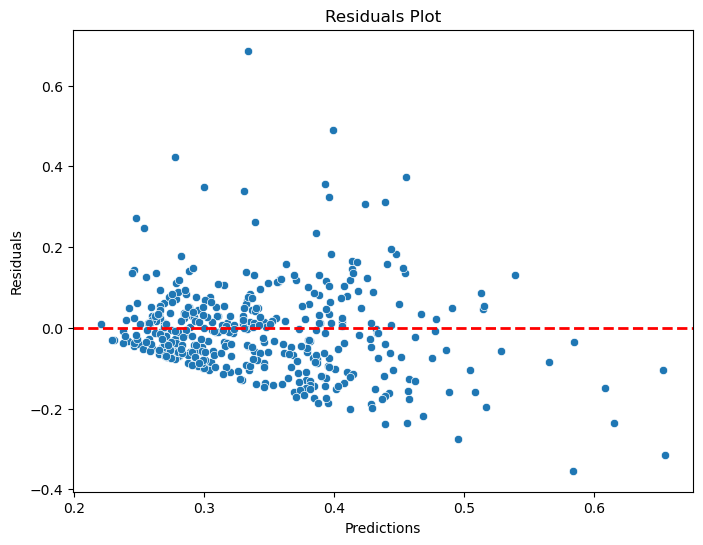

In [10]:
# Gráfica de residuos

residuals = y_test_CO - y_pred_best_model_CO

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_best_model_CO, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

The points are not symmetrically distributed; they tend to cluster, forming a clear pattern or trend in the diagram. This suggests that it is not a good model.

***
In general terms, the obtained results exhibit poor performance, especially when considering the available metrics. Although I have only conducted it for CO, it is reasonable to assume that other pollutants may also yield similarly unsatisfactory results. This lack of precision could be influenced by the limited number of variables present in the dataset when considering only one pollutant. Anticipating that predictions are likely to be inaccurate, with a significantly high error rate, I have chosen not to proceed with the development of a web page using the Streamlit library.

This decision is driven by the understanding that the weak quality of predictions could compromise the usability and reliability of the interface for users, potentially leading to misleading results. Therefore, it makes no sense to build a model if its prediction is likely to be inaccurate.